# Introducción a la Extracción de Información con LangExtract

¡Bienvenidos a la primera clase de Procesamiento del Lenguaje Natural (PLN)!

En este cuaderno, exploraremos una herramienta muy útil para la extracción de información de texto: **LangExtract**. Esta librería, desarrollada por Google, aprovecha el poder de los modelos de lenguaje grandes como Gemini para identificar y extraer entidades y relaciones específicas de un texto de forma estructurada.

Es importante destacar que LangExtract es una *herramienta* que facilita el proceso de extracción, pero no es una solución mágica. La calidad de la extracción depende en gran medida de la definición clara de la tarea, el diseño del prompt y la provisión de ejemplos de alta calidad.

Este cuaderno servirá como una demostración práctica de cómo utilizar LangExtract para una tarea de extracción simple, mostrándoles el flujo de trabajo desde la instalación hasta la visualización de los resultados.

Para más detalles sobre LangExtract, pueden consultar la siguiente referencia:
[Introducing LangExtract: A Gemini-powered information extraction library](https://developers.googleblog.com/es/introducing-langextract-a-gemini-powered-information-extraction-library/)

In [ ]:
!pip install -U langextract -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
import textwrap
import langextract as lx
import os
from google.colab import userdata

In [ ]:
secret_names = ['GEMINI_API_KEY', 'GOOGLE_API_KEY']
api_key_found = False

for sn in secret_names:
    try:
        # Intenta obtener la clave con uno de los nombres posibles
        api_key = userdata.get(sn)

        # Si se encuentra, la asignamos a la variable de entorno que langextract espera
        os.environ['LANGEXTRACT_API_KEY'] = api_key
        print(f"✅ Clave de API cargada exitosamente desde: '{sn}'")
        api_key_found = True
        break # Salimos del bucle una vez que encontramos la clave
    except userdata.SecretNotFoundError:
        # Si no se encuentra, simplemente continúa al siguiente nombre
        continue
    except Exception as e:
        print(f"❗️ Ocurrió un error inesperado: {e}")
        break

if not api_key_found:
    print("\n❌ ERROR: No se pudo encontrar una clave de API.")
    print(f"Asegúrate de haber guardado tu clave en los secretos de Colab con uno de estos nombres: {secret_names}")
    print("Andá al panel izquierdo -> 🔑 Secretos -> Nuevo secreto.")

✅ Clave de API cargada exitosamente desde: 'GOOGLE_API_KEY'


In [ ]:
# 1. Definir el prompt y las reglas de extracción.
prompt = textwrap.dedent("""\
    Extrae personajes, emociones y relaciones en orden de aparición.
    Usa el texto exacto para las extracciones. No parafrasees ni superpongas entidades.
    Proporciona atributos significativos para cada entidad para añadir contexto.""")

In [ ]:
# 2. Proporcionar un ejemplo de alta calidad para guiar al modelo.
examples = [
    lx.data.ExampleData(
        text="ROMEO. ¡Pero, silencio! ¿Qué luz alumbra esa ventana? Es el oriente, y Julieta es el sol.",
        extractions=[
            lx.data.Extraction(
                extraction_class="personaje",
                extraction_text="ROMEO",
                attributes={"estado_emocional": "asombro"}
            ),
            lx.data.Extraction(
                extraction_class="emocion",
                extraction_text="¡Pero, silencio!",
                attributes={"sentimiento": "admiración suave"}
            ),
            lx.data.Extraction(
                extraction_class="relacion",
                extraction_text="Julieta es el sol",
                attributes={"tipo": "metáfora"}
            ),
        ]
    )
]

print("Definición de la tarea de extracción creada.")

Definición de la tarea de extracción creada.


In [ ]:
# El texto de entrada a procesar.
input_text = "Lady Julieta contemplaba con anhelo las estrellas, su corazón dolía por Romeo"

# Ejecutar la extracción.
# Nota: Esto hará una llamada a la API de Gemini, lo cual puede incurrir en costos.
result = lx.extract(
    text_or_documents=input_text,
    prompt_description=prompt,
    examples=examples,
    model_id="gemini-1.5-flash", # Modelo rápido y eficiente.
)

# Imprimir las extracciones para ver el resultado estructurado.
print("Texto de Entrada:")
print(f'"{result.text}"\n')
print("Extracciones Encontradas:")
for entity in result.extractions:
    print(f"- Clase: {entity.extraction_class}")
    print(f"  Texto: {entity.extraction_text}")
    if entity.attributes:
        print(f"  Atributos: {entity.attributes}")
    if entity.char_interval:
        print(f"  Posición: ({entity.char_interval.start_pos}-{entity.char_interval.end_pos})\n")

LangExtract: model=gemini-1.5-flash, current=77 chars, processed=77 chars:  [00:01]

✓ Extraction processing complete
✓ Extracted 3 entities (3 unique types)
  • Time: 1.19s
  • Speed: 65 chars/sec
  • Chunks: 1
Texto de Entrada:
"Lady Julieta contemplaba con anhelo las estrellas, su corazón dolía por Romeo"

Extracciones Encontradas:
- Clase: personaje
  Texto: Lady Julieta
  Atributos: {'estado_emocional': 'anhelo'}
  Posición: (0-12)

- Clase: emocion
  Texto: su corazón dolía
  Atributos: {'sentimiento': 'dolor'}
  Posición: (51-67)

- Clase: relacion
  Texto: por Romeo
  Atributos: {'tipo': 'amor'}
  Posición: (68-77)



In [ ]:
from IPython.display import display, HTML

# Guardar los resultados en un archivo JSONL en memoria (opcional, pero es un buen hábito/buena practica).
# Para la visualización, necesitamos guardar y luego cargar el archivo.
output_dir = "/content/langextract_output"
os.makedirs(output_dir, exist_ok=True)
lx.io.save_annotated_documents([result], output_name="extraction_results.jsonl", output_dir=output_dir)

# Generar el contenido HTML desde el archivo de resultados.
html_content = lx.visualize(f"{output_dir}/extraction_results.jsonl")

# Mostrar la visualización interactiva en la celda de Colab.
display(html_content)

LangExtract: Saving to extraction_results.jsonl: 1 docs [00:00, 1047.01 docs/s]

✓ Saved 1 documents to extraction_results.jsonl



LangExtract: Loading extraction_results.jsonl: 100%|██████████| 911/911 [00:00<00:00, 1.65MB/s]

✓ Loaded 1 documents from extraction_results.jsonl


¡Espero que este cuaderno te haya sido útil para iniciarte en la extracción de información con LangExtract y que te motive a explorar más a fondo las capacidades de Google Colab!

Con Colab, podes aprovechar al máximo el potencial de este entorno para tus proyectos de PLN y mucho más.

Para seguir aprendiendo sobre Google Colab y sus funcionalidades, te recomiendo visitar:
[https://medium.com/google-colab](https://medium.com/google-colab)

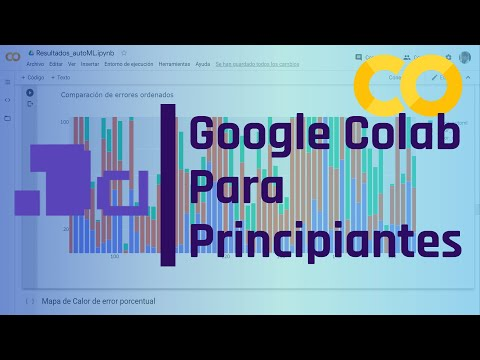

In [ ]:
from IPython.display import YouTubeVideo

video_id = "8VFYs3Ot_aA"
YouTubeVideo(video_id, width=800, height=450)